# ***Mushroom Classification 🍄***

![](https://wallpapercave.com/wp/wp10369970.jpg)

**In this project, we will try to figure out if a mushroom is edible or not.**

**This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as edible or poisonous.**


**We will tackle this classification problem using**  
* Logistic Regression 
* Ridge Classifier 
* Decision Tree 
* Naive Bayes 
* Neural Networks

**After comparing the results of each model, we will find out the best performing one.**

![](https://images3.alphacoders.com/106/thumb-1920-1065128.jpg)

**📌Importing the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report

**📌Dataset and preprocessing**

In [2]:
data = pd.read_csv("/kaggle/input/mushroomcsv/mushrooms.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Let's write the features one by one to make it more understandable.**

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

![](https://cdn.shopify.com/s/files/1/0031/4756/3081/files/Anatomy3.jpg?v=1596220270)

**📌Visualize the data**

In [5]:
classes = data["class"].value_counts()
classes

e    4208
p    3916
Name: class, dtype: int64

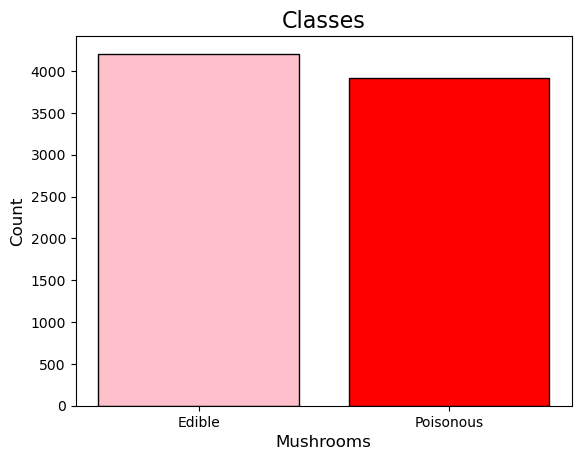

In [6]:
plt.bar("Edible", classes["e"], color="pink", edgecolor="black")
plt.bar("Poisonous", classes["p"], color="red", edgecolor="black")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Mushrooms', fontsize=12)
plt.title("Classes",fontsize=16)
plt.show()


*We see that the "Edible" and "Poisonous" values are very close to each other.
This means that the data is balanced.*

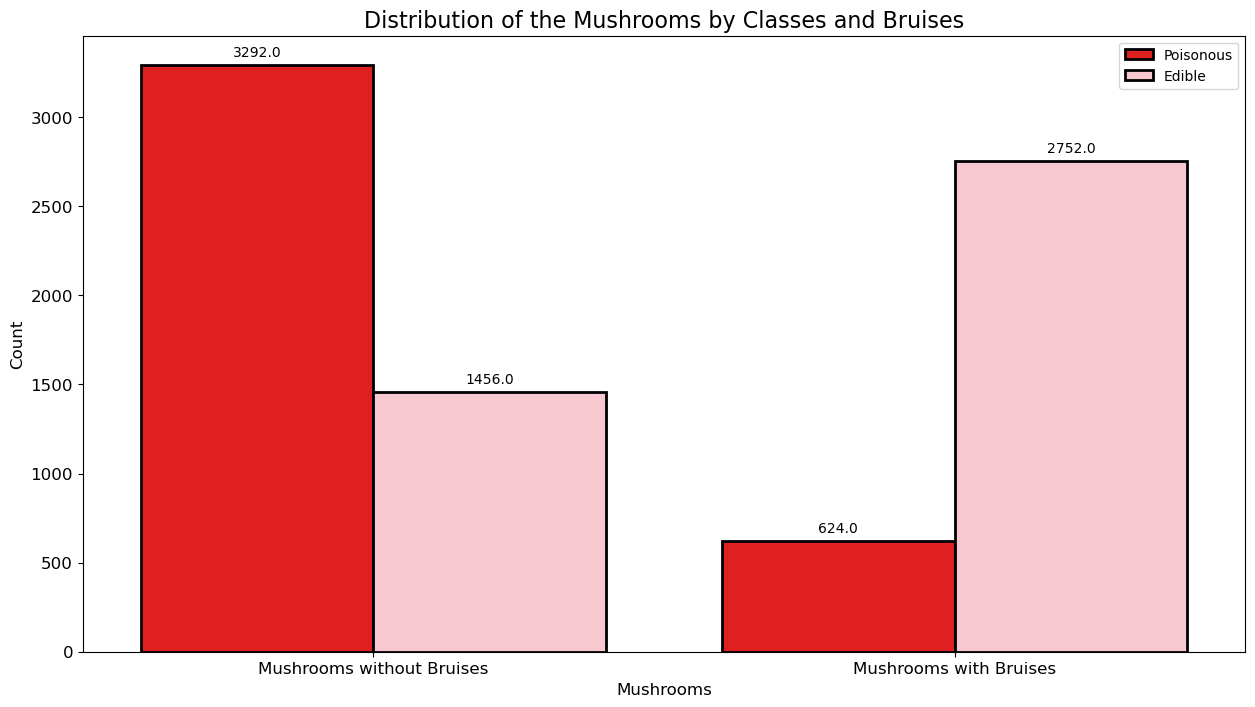

In [7]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='bruises',
                      hue='class',
                      order=data['bruises'].value_counts().index,
                      palette=['red', 'pink'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Mushrooms', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=16)
plt.show()

*As we can see from the graph above, Mushrooms without Bruises are high frequently poisonous. In contrast, the Mushrooms with the Bruises are highly edible.*

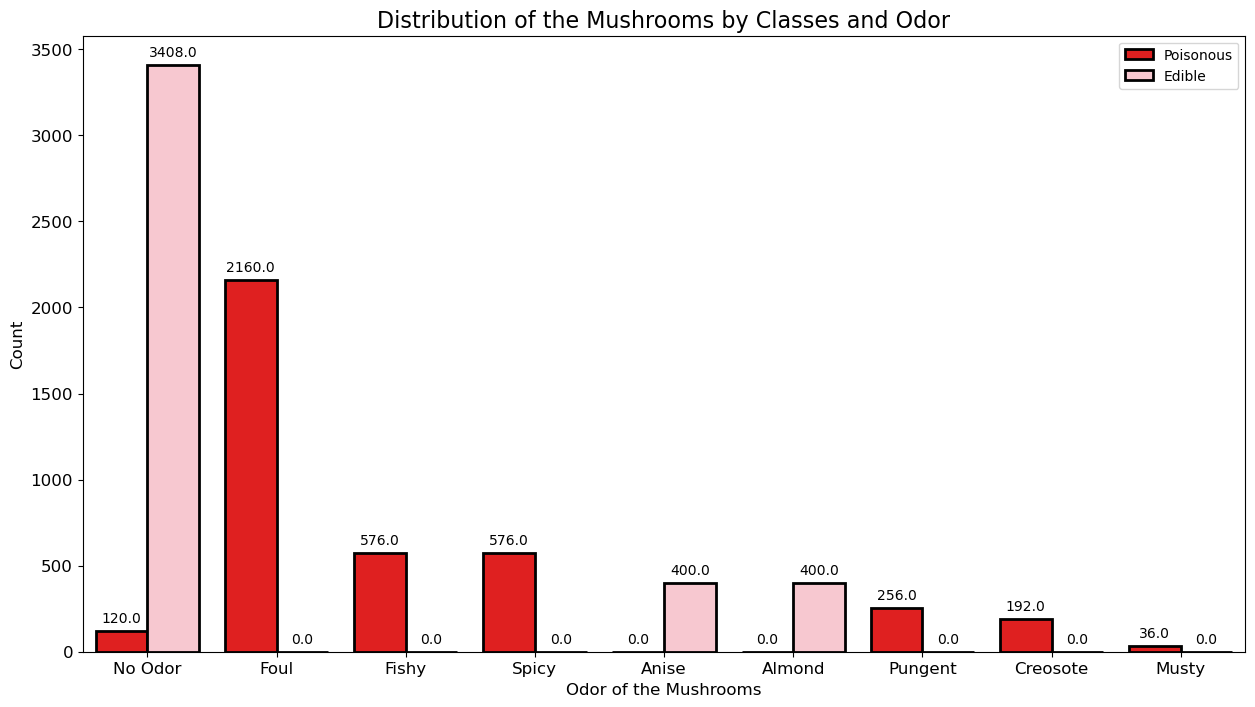

In [8]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='odor',
                      hue='class',
                      order=data['odor'].value_counts().index,
                      palette=['red', 'pink'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Odor of the Mushrooms', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Odor', fontsize=16)
plt.show()

*According to the graph above, odorless mushrooms are highly safe for humans. However Foul, Fishy and Spicy mushrooms are often poisonous. Anise and Almond fragrant mushrooms do not have a poisonous class.*

**📌Features and labels**

In [9]:
X = data.loc[:, ["cap-shape", "cap-color", "ring-number", "ring-type"]]
y = data.loc[:, "class"]

**📌Converting the values**

In [10]:
encoder = LabelEncoder()

for i in X.columns:
  X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

In [11]:
X

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

**📌Split the data**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**📌Creating and training models**

*We have to try and compare different models to say definitively which model will perform best.*

In [14]:
logistic_classifier_model = LogisticRegression()

ridge_classifier_model = RidgeClassifier()

decision_tree_model = DecisionTreeClassifier()

naive_bayes_model = GaussianNB()

neural_network_model = MLPClassifier()

In [15]:
logistic_classifier_model.fit(X_train, y_train)

ridge_classifier_model.fit(X_train, y_train)

decision_tree_model.fit(X_train, y_train)

naive_bayes_model.fit(X_train, y_train)

neural_network_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [16]:
logistic_pred = logistic_classifier_model.predict(X_test)

ridge_pred = ridge_classifier_model.predict(X_test)

tree_pred = decision_tree_model.predict(X_test)

naive_bayes_pred = naive_bayes_model.predict(X_test)

neural_network_pred = neural_network_model.predict(X_test)

**📌Comparing the performances**

In [17]:
logistic_report = classification_report(y_test, logistic_pred)

ridge_report = classification_report(y_test, ridge_pred)

tree_report = classification_report(y_test, tree_pred)

naive_bayes_report = classification_report(y_test, naive_bayes_pred)

neural_network_report = classification_report(y_test, neural_network_pred)

*We print and compare the results of all models to improve readability.*

In [18]:
print("***** Logistic Regression *****")
print(logistic_report)
      
print("***** Ridge Regression *****")
print(ridge_report)

print("***** Decision Tree *****")
print(tree_report)

print("***** Naive Bayes *****")
print(naive_bayes_report)

print("***** Neural Network *****")
print(neural_network_report)

***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1217
           1       0.79      0.80      0.80      1221

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438

***** Ridge Regression *****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1217
           1       0.79      0.80      0.80      1221

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438

***** Decision Tree *****
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1217
           1       0.89      0.94      0.91      1221

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.

*With an accuracy of 91 (f1-score), we can say that the Decision Tree Algorithm performs best in all types.*

**📌Evaluation**

*Decision tree performed best. So maybe we can take things one step further and try the Random Forest algorithm to see if it works better.*

In [19]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

In [20]:
random_forest_report = classification_report(y_test, random_forest_pred)

print(random_forest_report)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1217
           1       0.89      0.94      0.91      1221

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438



*Same result! For this dataset, we can conclude that there is no difference between using decision tree and random forest.*

# *Thanks for your reading!*

![](https://media.istockphoto.com/id/1310455429/photo/notes-thank-you-coffee-cup-laptop-bouquet-of-flowers-lily-of-the-valley-on-desk-workplace-in.jpg?s=612x612&w=0&k=20&c=joo26DZGDAGU2yJIjrBOXwgh9MmFl5rrykpLCRzseZk=)